In [1]:
import sys
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
print(f'Python  version: {sys.version}')
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')

Python  version: 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
pandas  version: 1.4.4
numpy   version: 1.22.4


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/dataAir_dindang.csv',usecols=[0,1,2,3,4,5,6,7,8,9,10,11],parse_dates=['date'], skipinitialspace=True)
data

,date,pm10,co,no,no2,nox,pm25,avgT,humid,pressure-monthly,windDir,windSpd
0,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,27.1,70,1009.40,100.0,9.0
1,2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,27.5,67,1009.40,120.0,4.0
2,2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,28.2,66,1009.40,60.0,4.0
3,2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,29.3,64,1009.40,330.0,6.0
4,2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,30.4,63,1009.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1760,2022-10-27,46.0,0.5,25.33,20.4,45.73,16.0,28.5,79,1009.24,120.0,9.0
1761,2022-10-28,55.0,0.6,41.57,25.2,66.77,19.0,29.6,72,1009.24,170.0,7.0
1762,2022-10-29,57.0,0.5,21.73,24.7,46.45,20.0,29.5,62,1009.24,120.0,13.0
1763,2022-10-30,80.0,0.9,35.39,38.3,73.66,32.0,30.0,62,1009.24,120.0,13.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1765 non-null   datetime64[ns]
 1   pm10              1698 non-null   float64       
 2   co                1714 non-null   float64       
 3   no                1713 non-null   float64       
 4   no2               1713 non-null   float64       
 5   nox               1712 non-null   float64       
 6   pm25              1028 non-null   float64       
 7   avgT              1695 non-null   float64       
 8   humid             1765 non-null   int64         
 9   pressure-monthly  1765 non-null   float64       
 10  windDir           1735 non-null   float64       
 11  windSpd           1737 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 165.6 KB


In [7]:
data=data.sort_values('date').reset_index(drop=True).copy()
data

,date,pm10,co,no,no2,nox,pm25,avgT,humid,pressure-monthly,windDir,windSpd
0,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,27.1,70,1009.40,100.0,9.0
1,2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,27.5,67,1009.40,120.0,4.0
2,2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,28.2,66,1009.40,60.0,4.0
3,2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,29.3,64,1009.40,330.0,6.0
4,2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,30.4,63,1009.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1760,2022-10-27,46.0,0.5,25.33,20.4,45.73,16.0,28.5,79,1009.24,120.0,9.0
1761,2022-10-28,55.0,0.6,41.57,25.2,66.77,19.0,29.6,72,1009.24,170.0,7.0
1762,2022-10-29,57.0,0.5,21.73,24.7,46.45,20.0,29.5,62,1009.24,120.0,13.0
1763,2022-10-30,80.0,0.9,35.39,38.3,73.66,32.0,30.0,62,1009.24,120.0,13.0


In [8]:
y_col='pm25'

In [9]:
data.dropna(subset=[y_col], inplace=True)
data=data.reset_index(drop=True)
data

,date,pm10,co,no,no2,nox,pm25,avgT,humid,pressure-monthly,windDir,windSpd
0,2020-01-07,140.0,1.09,21.66,34.04,55.70,33.0,30.8,63,1011.12,110.0,6.0
1,2020-01-08,118.0,0.93,26.20,31.36,57.55,47.0,30.5,69,1011.12,120.0,9.0
2,2020-01-09,137.0,1.37,73.71,42.93,116.34,49.0,30.8,68,1011.12,240.0,8.0
3,2020-01-10,183.0,1.45,57.53,55.32,112.85,80.0,30.6,69,1011.12,120.0,8.0
4,2020-01-11,123.0,0.67,6.79,26.72,33.51,43.0,29.8,80,1011.12,160.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1023,2022-10-27,46.0,0.50,25.33,20.40,45.73,16.0,28.5,79,1009.24,120.0,9.0
1024,2022-10-28,55.0,0.60,41.57,25.20,66.77,19.0,29.6,72,1009.24,170.0,7.0
1025,2022-10-29,57.0,0.50,21.73,24.70,46.45,20.0,29.5,62,1009.24,120.0,13.0
1026,2022-10-30,80.0,0.90,35.39,38.30,73.66,32.0,30.0,62,1009.24,120.0,13.0


In [10]:
def date_parts(data, date_colname='date'):
    '''create year, month, day, dayname columns'''
    data['year']=data['date'].dt.year
    data['month']=data['date'].dt.month
    data['day']=data['date'].dt.day
    data['day_name']=data['date'].dt.day_name().astype('category')

In [11]:
date_parts(data)

In [12]:
data

,date,pm10,co,no,no2,nox,pm25,avgT,humid,pressure-monthly,windDir,windSpd,year,month,day,day_name
0,2020-01-07,140.0,1.09,21.66,34.04,55.70,33.0,30.8,63,1011.12,110.0,6.0,2020,1,7,Tuesday
1,2020-01-08,118.0,0.93,26.20,31.36,57.55,47.0,30.5,69,1011.12,120.0,9.0,2020,1,8,Wednesday
2,2020-01-09,137.0,1.37,73.71,42.93,116.34,49.0,30.8,68,1011.12,240.0,8.0,2020,1,9,Thursday
3,2020-01-10,183.0,1.45,57.53,55.32,112.85,80.0,30.6,69,1011.12,120.0,8.0,2020,1,10,Friday
4,2020-01-11,123.0,0.67,6.79,26.72,33.51,43.0,29.8,80,1011.12,160.0,14.0,2020,1,11,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,2022-10-27,46.0,0.50,25.33,20.40,45.73,16.0,28.5,79,1009.24,120.0,9.0,2022,10,27,Thursday
1024,2022-10-28,55.0,0.60,41.57,25.20,66.77,19.0,29.6,72,1009.24,170.0,7.0,2022,10,28,Friday
1025,2022-10-29,57.0,0.50,21.73,24.70,46.45,20.0,29.5,62,1009.24,120.0,13.0,2022,10,29,Saturday
1026,2022-10-30,80.0,0.90,35.39,38.30,73.66,32.0,30.0,62,1009.24,120.0,13.0,2022,10,30,Sunday


In [13]:
data.columns

Index(['date', 'pm10', 'co', 'no', 'no2', 'nox', 'pm25', 'avgT', 'humid',
       'pressure-monthly', 'windDir', 'windSpd', 'year', 'month', 'day',
       'day_name'],
      dtype='object')

In [14]:
df=data[['date', 'year', 'month', 'day', 'day_name', y_col]]
df

,date,year,month,day,day_name,pm25
0,2020-01-07,2020,1,7,Tuesday,33.0
1,2020-01-08,2020,1,8,Wednesday,47.0
2,2020-01-09,2020,1,9,Thursday,49.0
3,2020-01-10,2020,1,10,Friday,80.0
4,2020-01-11,2020,1,11,Saturday,43.0
...,...,...,...,...,...,...
1023,2022-10-27,2022,10,27,Thursday,16.0
1024,2022-10-28,2022,10,28,Friday,19.0
1025,2022-10-29,2022,10,29,Saturday,20.0
1026,2022-10-30,2022,10,30,Sunday,32.0


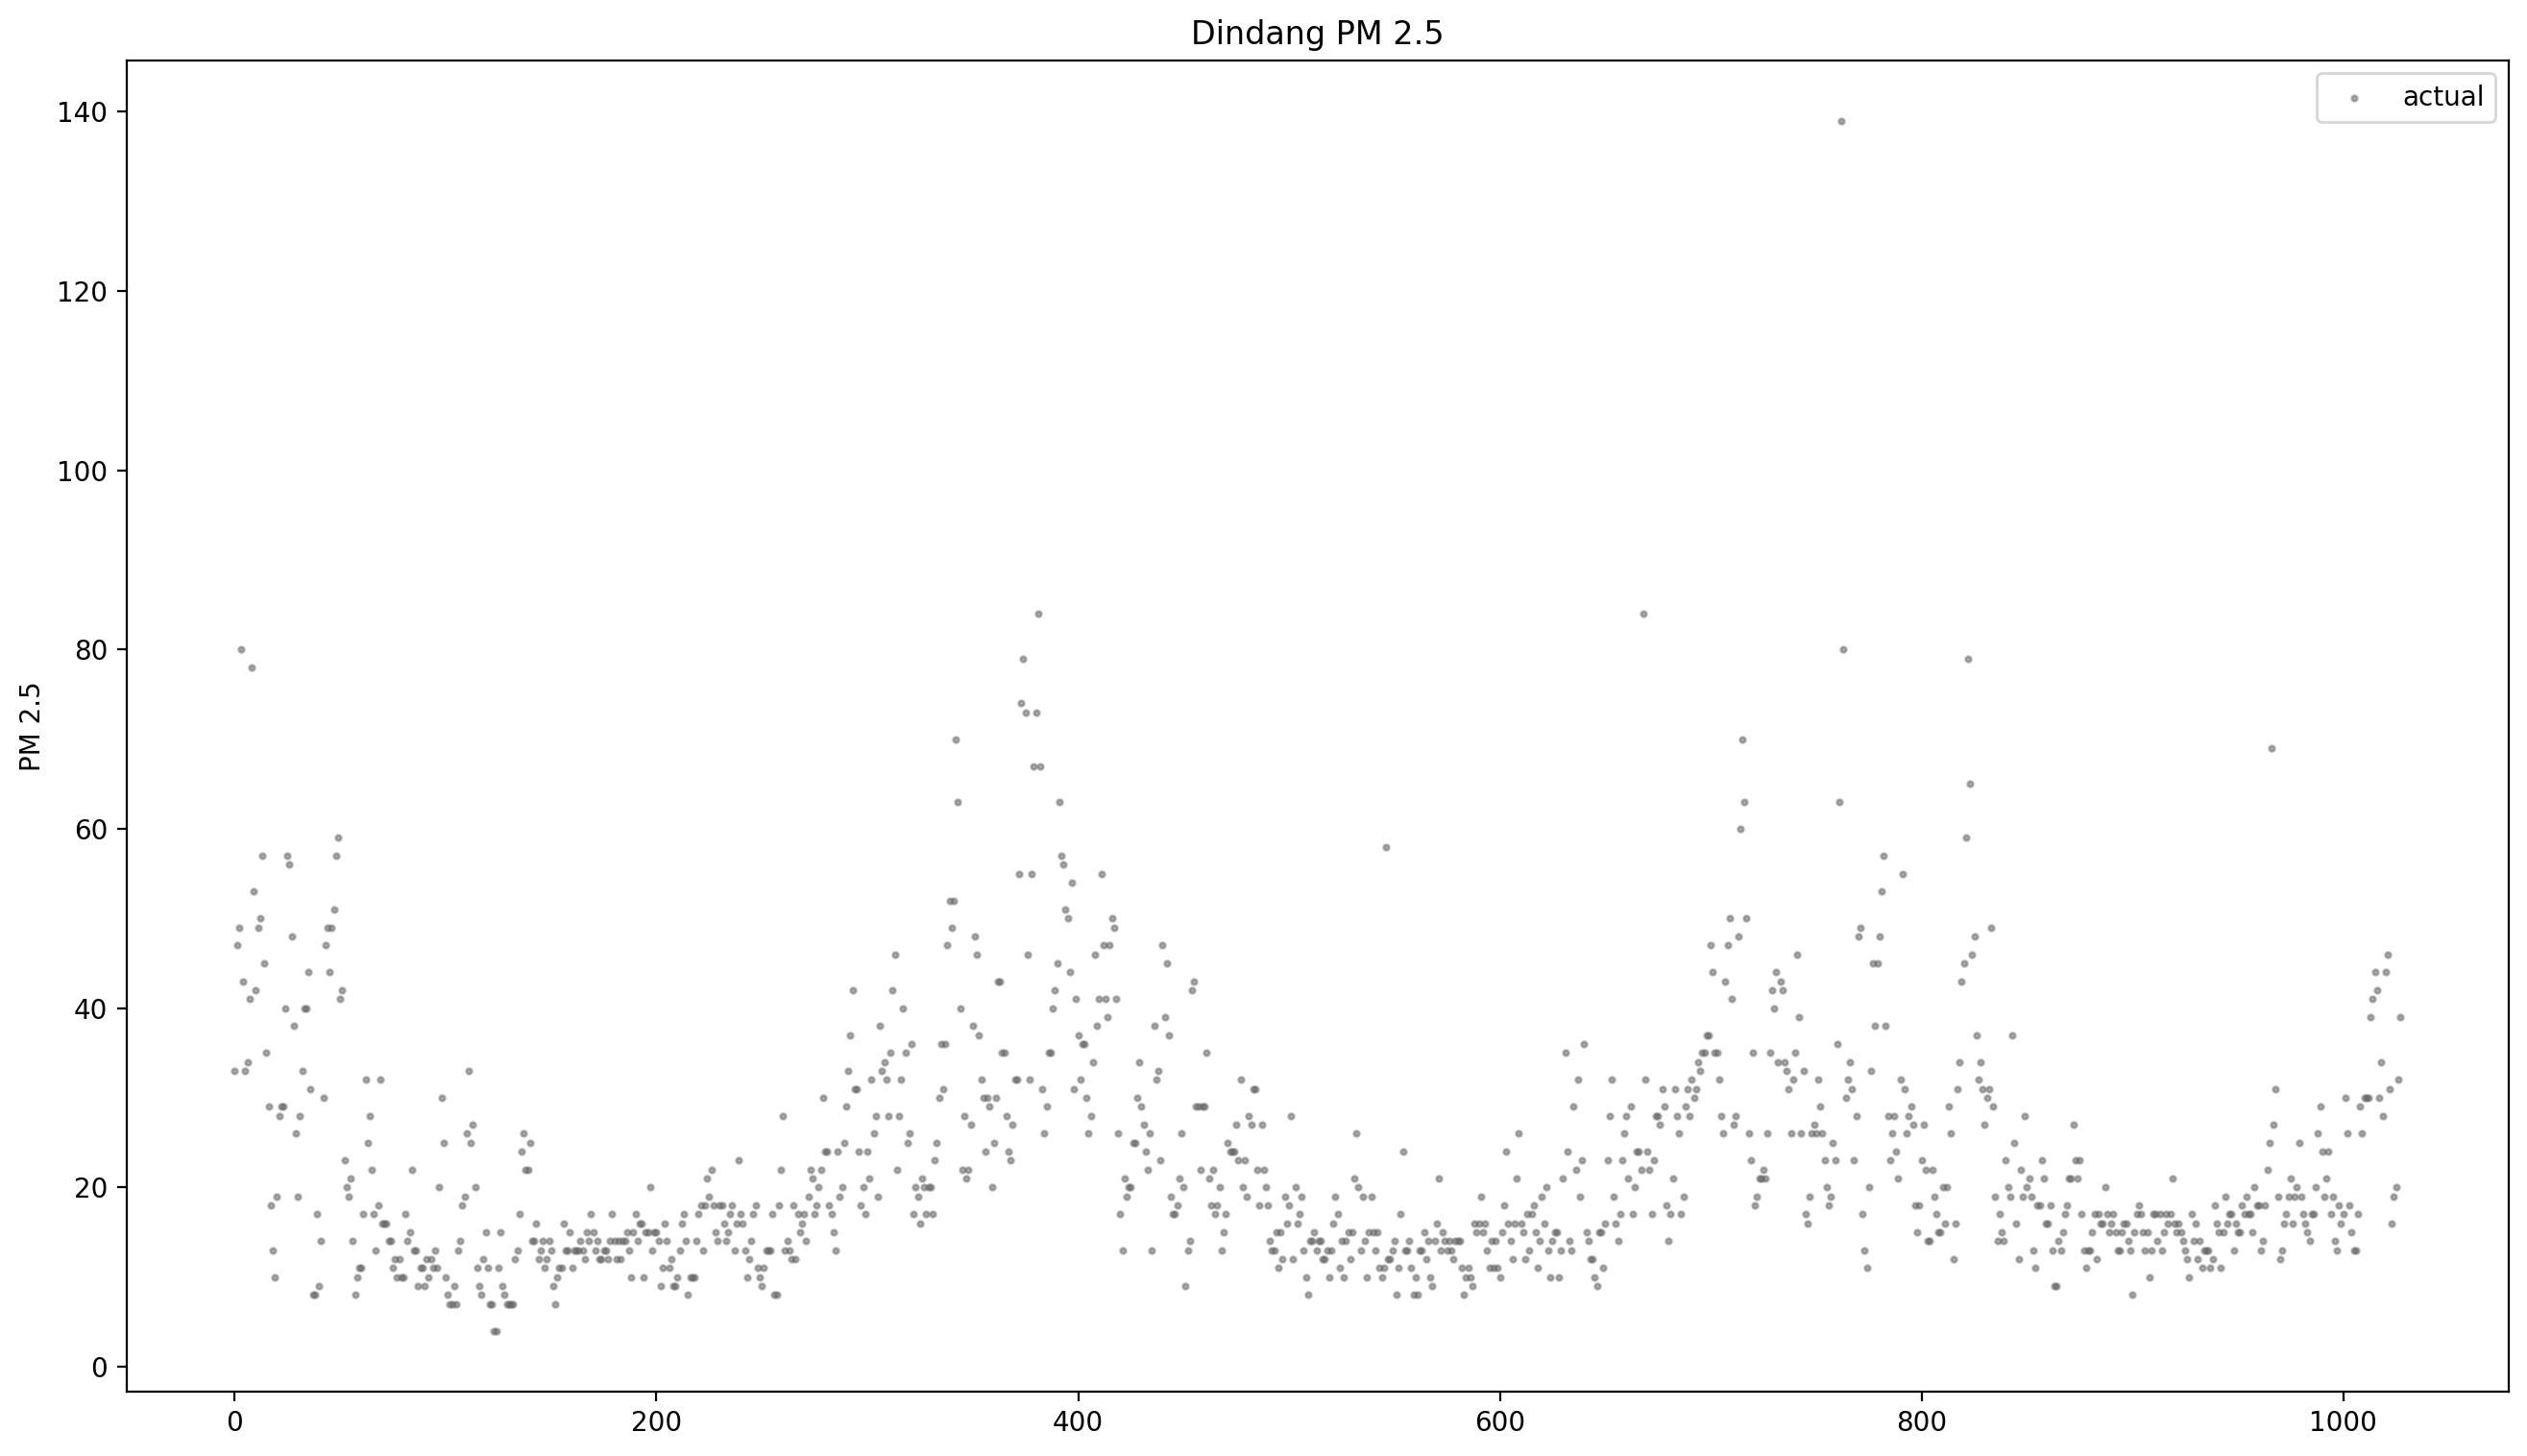

In [15]:
plt.figure(figsize=(16, 9))
plt.scatter(df.index, df[y_col], alpha=.5, s=4, label='actual', color='.4')
plt.ylabel('PM 2.5')
plt.title('Dindang PM 2.5')
plt.legend();

In [16]:
feature_cols=[
    'year', 'month', 
    'day', 
    'day_name'
]
X=df[feature_cols]
y=df[y_col]

In [17]:
df=data.copy()
df['y']=df['pm25'].shift(-1)


In [18]:
train=df[:-8]
test=df[-8:]
test=test.drop(test.tail(1).index)

In [19]:
X_train = train['y'].values.reshape(-1,1)
y_test = test['pm25'].values.reshape(-1,1)
y_train = train['y'].values.reshape(-1,1)
X_test =test['pm25'].values.reshape(-1,1)

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=42)
reg.fit(X=X_train, y=y_train.ravel())
reg_pred = reg.predict(X_test)
test['gbr_pred'] = reg_pred
test

,date,pm10,co,no,no2,nox,pm25,avgT,humid,pressure-monthly,windDir,windSpd,year,month,day,day_name,y,gbr_pred
1020,2022-10-24,108.0,1.4,52.05,47.0,99.01,44.0,30.7,76,1009.24,130.0,9.0,2022,10,24,Monday,46.0,43.994607
1021,2022-10-25,115.0,1.3,52.91,48.6,101.54,46.0,30.9,72,1009.24,340.0,7.0,2022,10,25,Tuesday,31.0,46.000345
1022,2022-10-26,84.0,0.9,35.98,40.6,76.59,31.0,30.3,69,1009.24,110.0,7.0,2022,10,26,Wednesday,16.0,30.998768
1023,2022-10-27,46.0,0.5,25.33,20.4,45.73,16.0,28.5,79,1009.24,120.0,9.0,2022,10,27,Thursday,19.0,16.000357
1024,2022-10-28,55.0,0.6,41.57,25.2,66.77,19.0,29.6,72,1009.24,170.0,7.0,2022,10,28,Friday,20.0,19.000117
1025,2022-10-29,57.0,0.5,21.73,24.7,46.45,20.0,29.5,62,1009.24,120.0,13.0,2022,10,29,Saturday,32.0,19.999454
1026,2022-10-30,80.0,0.9,35.39,38.3,73.66,32.0,30.0,62,1009.24,120.0,13.0,2022,10,30,Sunday,39.0,31.999037


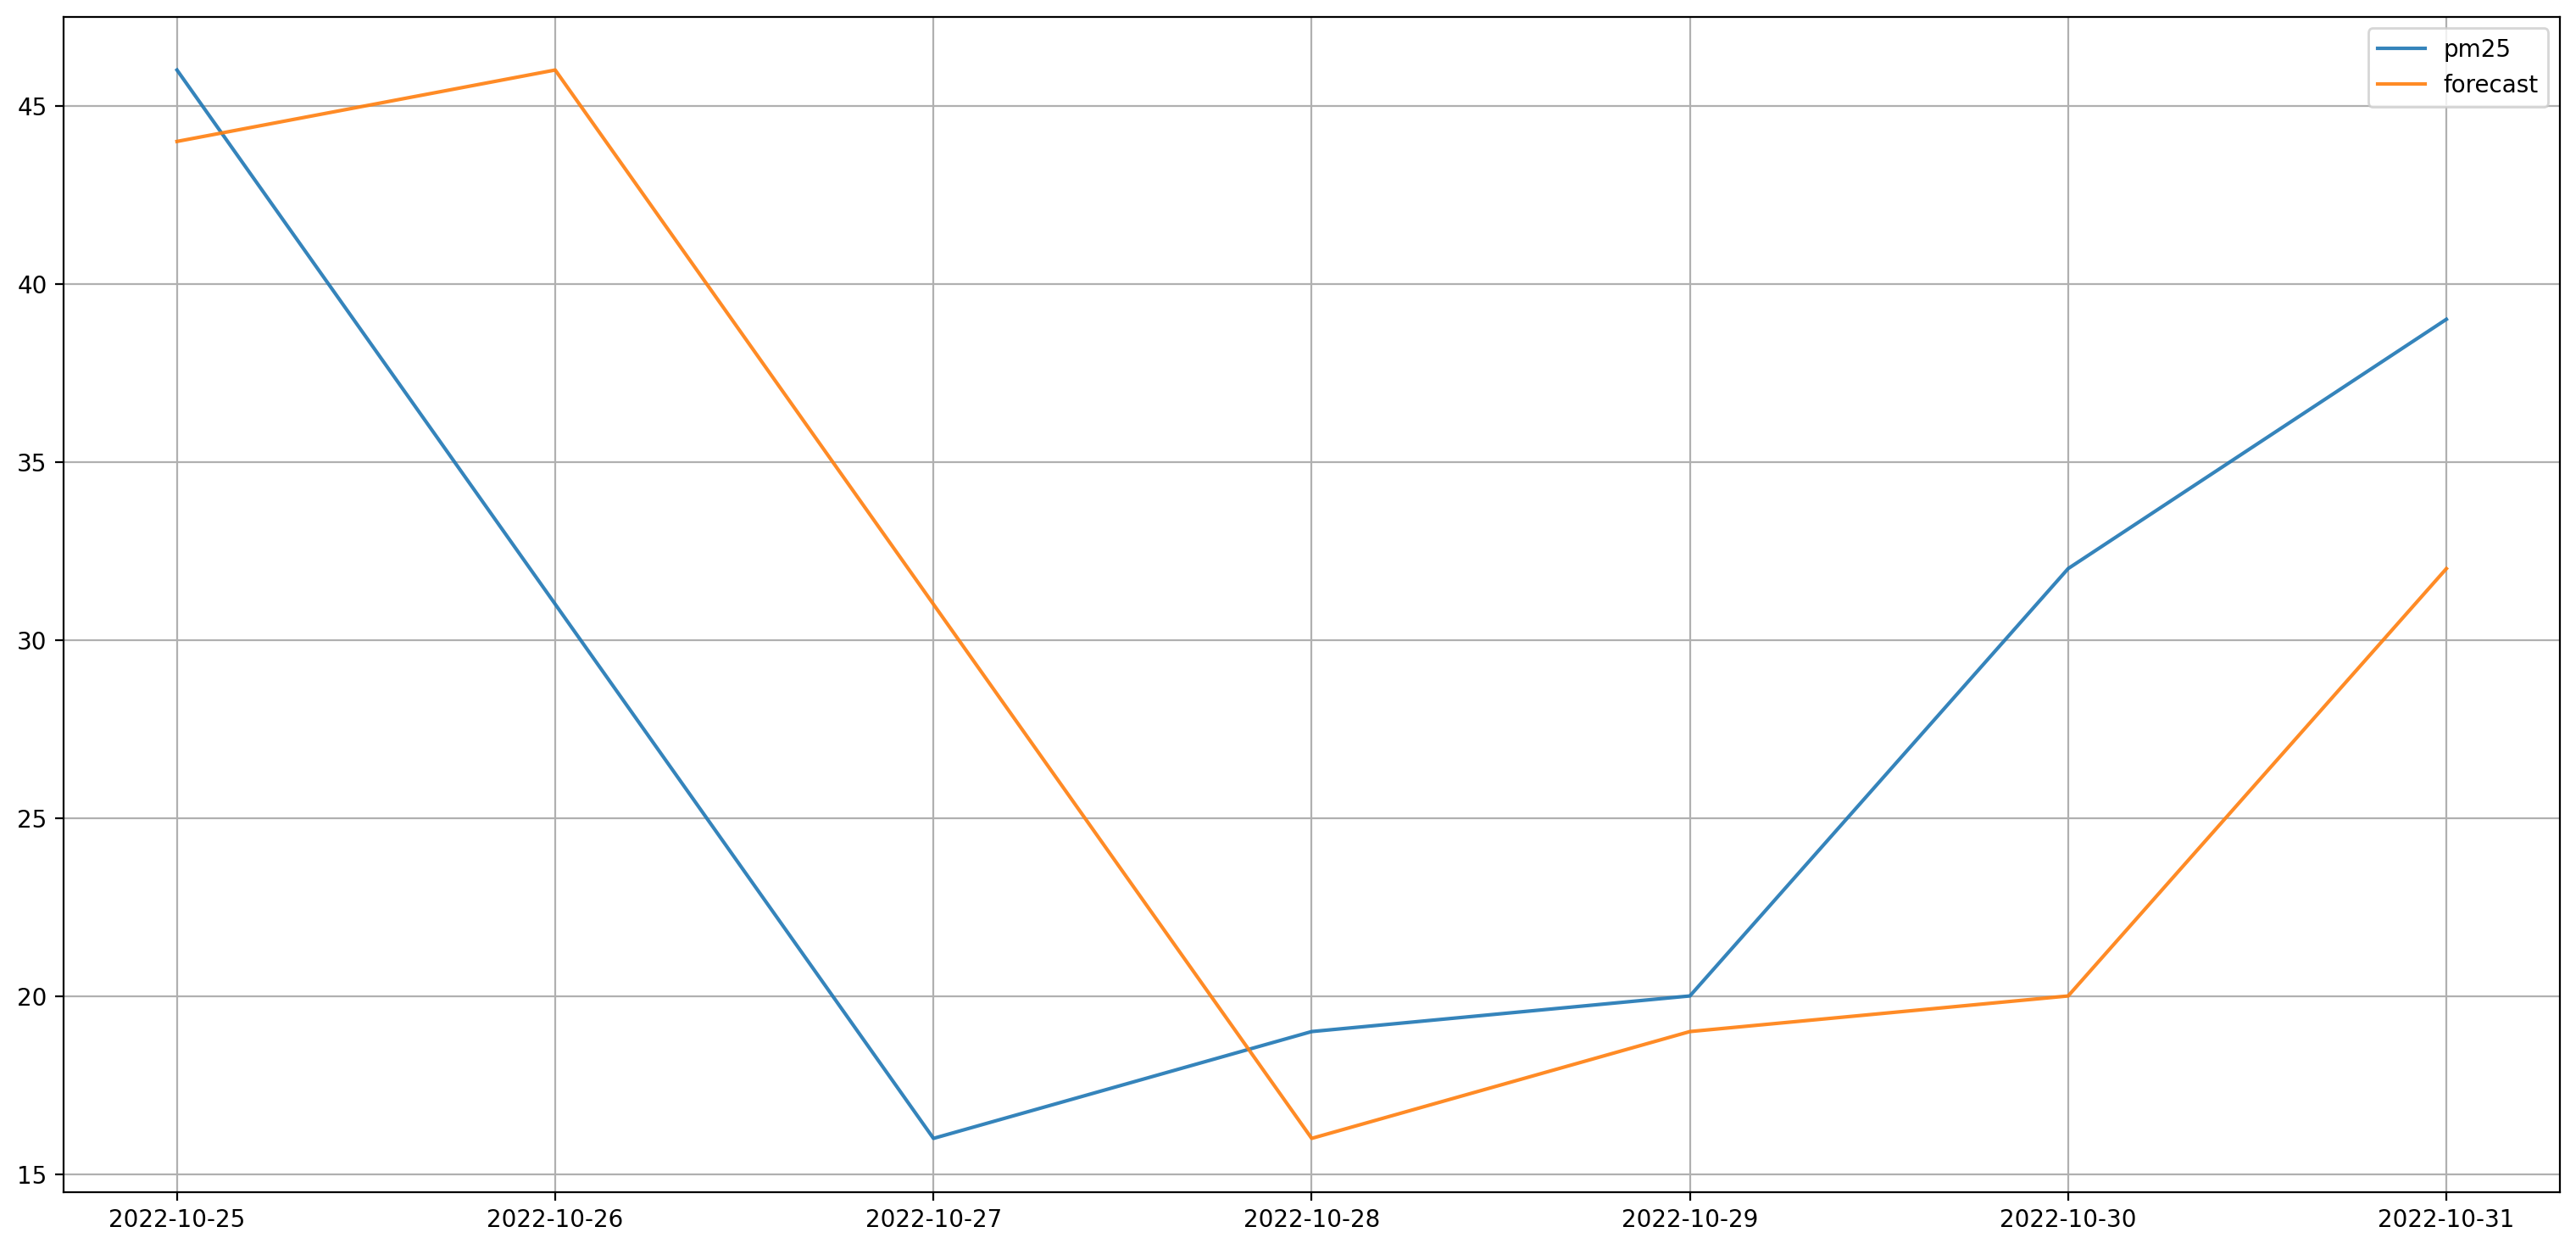

In [21]:
# test พยากรณ์กราฟ
yhat = reg.predict(X_test)

# Constructing the forecast dataframe
fc = df.tail(len(yhat)).copy() #ข้อมูลส่วนท้ายเป็น test
fc.reset_index(inplace=True)
fc['forecast'] = yhat
# Ploting the forecasts
plt.figure(figsize=(19, 9))
for dtype in ['pm25', 'forecast']: #'forecast'

    plt.plot(
        'date',
        dtype,
        data=fc,
        label=dtype,
        alpha=0.9
    )
plt.legend()
plt.grid()
plt.show()

In [22]:
reg.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [23]:
params={'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
}
# reg = lgb.LGBMRegressor()
# reg = lgb.LGBMRegressor(**params)

In [24]:
reg.__dict__

{'n_estimators': 100,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'criterion': 'friedman_mse',
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'subsample': 1.0,
 'max_features': None,
 'max_depth': 3,
 'min_impurity_decrease': 0.0,
 'ccp_alpha': 0.0,
 'init': None,
 'random_state': 42,
 'alpha': 0.9,
 'verbose': 0,
 'max_leaf_nodes': None,
 'warm_start': False,
 'validation_fraction': 0.1,
 'n_iter_no_change': None,
 'tol': 0.0001,
 'n_features_in_': 1,
 '_loss': <sklearn.ensemble._gb_losses.LeastSquaresError at 0x7f4766b15b80>,
 'max_features_': 1,
 'init_': DummyRegressor(),
 'estimators_': array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                               random_state=RandomState(MT19937) at 0x7F4765BF0140)],
        [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                               random_state=RandomState(MT19937) at 0x7F4765BF0140)],
        [DecisionTreeRegressor(criterion='fried

In [25]:
#reg.predict(X_test)

In [26]:
yhat=[]
yhat = reg.predict(X_test)

In [27]:
Y_Pred=reg.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(X_test,Y_Pred)
print('Mse',mse)
rmse = np.sqrt(mse)
print('Rmse',rmse)

Mse 4.5845373257368e-06
Rmse 0.0021411532700245446


In [28]:
predict = pd.DataFrame(yhat)
ypred = predict.rename(columns={0:'พยากรณ์ PM2.5'}).round(0)
ypred

,พยากรณ์ PM2.5
0,44.0
1,46.0
2,31.0
3,16.0
4,19.0
5,20.0
6,32.0


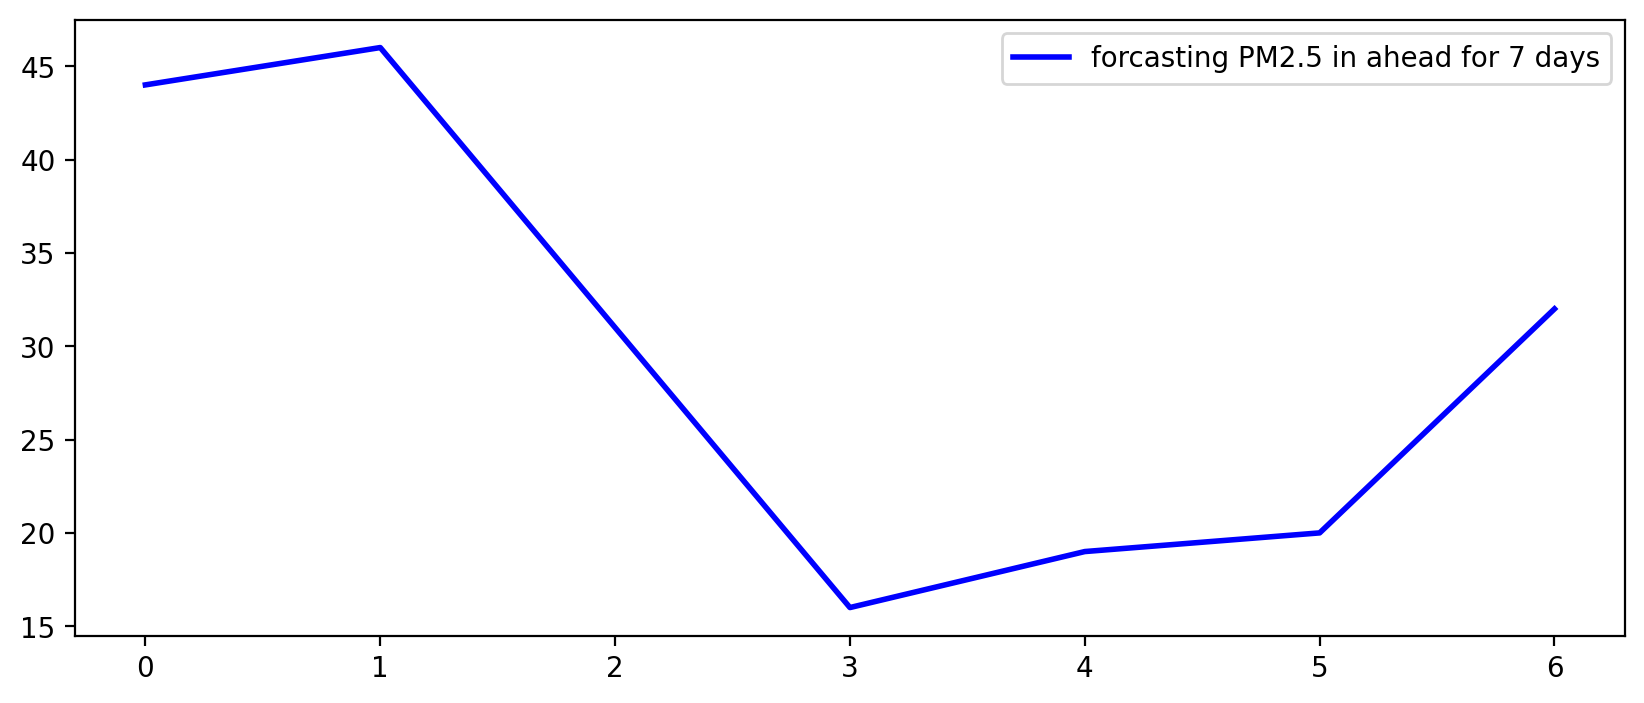

In [29]:
plt.figure(figsize=(10, 4))
plt.plot(ypred, 'b', lw=2.0, label='forcasting PM2.5 in ahead for 7 days')
plt.legend()
plt.show()